In [1]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['CODE_ROOT'])

In [3]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile

In [4]:
dryrun  = False
version = 'GAMA4'
survey  = 'gama'

##  kE Catalog

In [5]:
fpath   = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
86187,587722983890026653,185.64764412,0.45825774,17.885168,0.23773,4,G12_Y1_IN1_366,6,20.97136,19.13244,17.69423,17.180195,16.8645,0.23773,840.5726708609474,39.62287632944614,G12,0,0,-675.8062612682004,-66.83079688776589,5.431651350640607,676.2613794170416,62.116879849571745,4.6905186350961925,1.4382114,17.885168,1.0221831617635122,0,6,0.10036243227669306,0.5163907115532198,0.33652183845436306,0.9173801631494414,0.8573531163449608,0.8,-0.2305981,-0.190184,-21.84363198535866,-21.884046095184747,-22.074230092338983,39.72880006092018,39.9593981679005,39.76921417074627,-0.02610221695577676,0.25065673311151676,0.19062266140642437,0.51583202282518,-21.69773280831072
617429,588848900463329480,211.51215914,0.33337858,16.491335,0.05383,4,G15_Y6_072_126,6,18.441204,17.068653,16.389126,15.991108,15.69622,0.05383,168.3225606128227,36.13071164621924,G15,0,0,-136.1675749443299,-83.48335106299008,0.9293608415316806,136.7473174971628,82.53184613359454,0.779495741336187,0.6795273,16.491335,0.743982896440262,0,5,-0.1549470888593293,-0.2194027025847476,0.07143610749723148,0.0980003458903182,0.652963044321757,0.8,-0.052215103,-0.043064002,-19.65859773549533,-19.667748836607696,-19.710812838555338,36.14993265065647,36.202147753716474,36.15908375176883,-0.14544953276563438,-0.1915606934090779,0.07127534559656673,0.07361459630458539,-19.658436973594668
594128,588848899929800874,219.05986017,-0.07440745,17.661882,0.13694,5,344534744807008256,6,19.502266,18.28102,17.649033,17.278406,17.08318,0.13694,454.3391400668327,38.286900758504636,G15,0,0,-310.2965986762804,-251.81045450990524,-0.5189628516176182,312.04413432684754,249.64068275010177,-0.8609420807934335,0.6319866,17.661882,0.5739814157838801,0,4,-0.08154459967853901,-0.023539397420426808,0.13025891341234525,0.2316107736620236,0.5306347577923138,2.12,-0.13283181,-0.2903128,-20.622445459499378,-20.464964474573154,-20.755277271404285,38.28432786001208,38.417159671916984,38.12684687508585,-0.07849917485313306,-0.019353226563168485,0.13822570350906804,0.2458220631504948,-20.6304122495961
619784,588848900467655041,221.331891,0.28400507,19.199787,0.2063,4,G15_Y2_014_259,6,22.054535,20.266598,19.106667,18.666481,18.32868,0.2063,715.7382006779324,39.27377098589429,G15,0,0,-445.5266613190083,-391.84432420106833,2.9410373795726867,448.2510540490064,388.72820986399864,2.449786808740405,1.1599312,19.199787,0.8740424713218576,0,6,0.025702647521857025,0.31159135906132757,0.25323595602057025,0.6765667657893946,0.7366003730925038,0.8,-0.20011102,-0.16504,-20.127108785391155,-20.162179800749126,-20.32721980202228,39.32689592528373,39.527006941914856,39.3619669406417,-0.041940240814488536,0.1622401598981713,0.17478463754771256,0.4274154496118346,-20.048657466918296
517646,588010358528868746,133.10434664,2.46904323,19.02159,0.21168,4,G09_Y1_CX2_265,6,22.315638,20.25712,18.987331,18.496666,18.107693,0.21168,736.8315164616245,39.33684096822303,G9,0,0,-415.15174372520573,443.57337261322016,26.19

In [28]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = kE[(idx == jj) & (kE['MCOLOR_0P0'].data >= -23.) & (kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.025
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample / dbin, lw=1, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    plt.ylim(0., 10.)
    
    plt.legend(frameon=False)

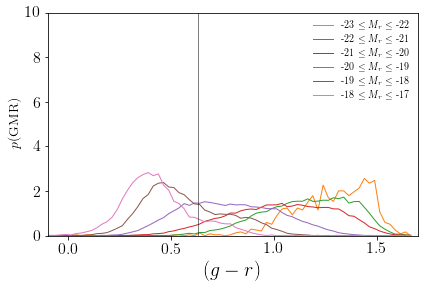

In [29]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

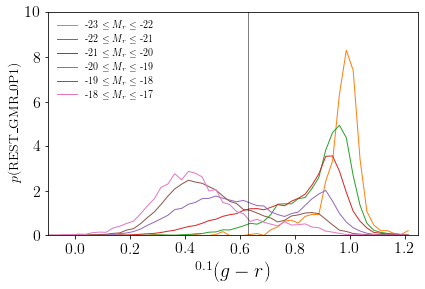

In [30]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

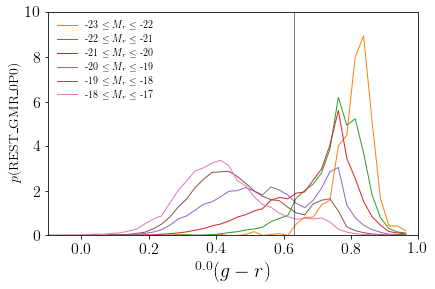

In [31]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

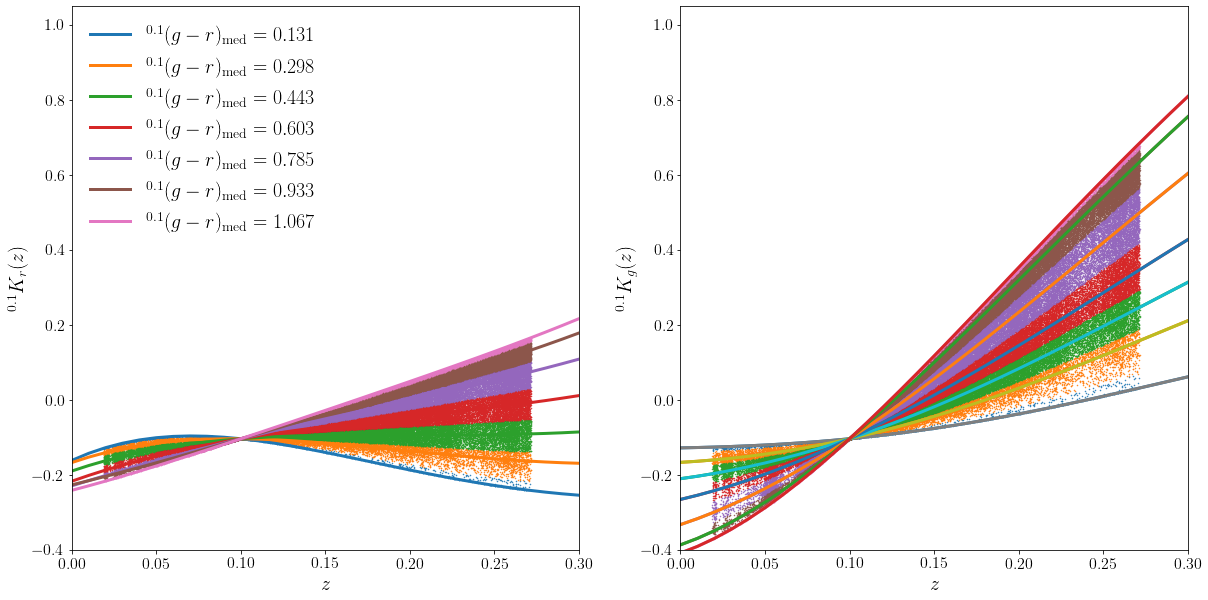

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

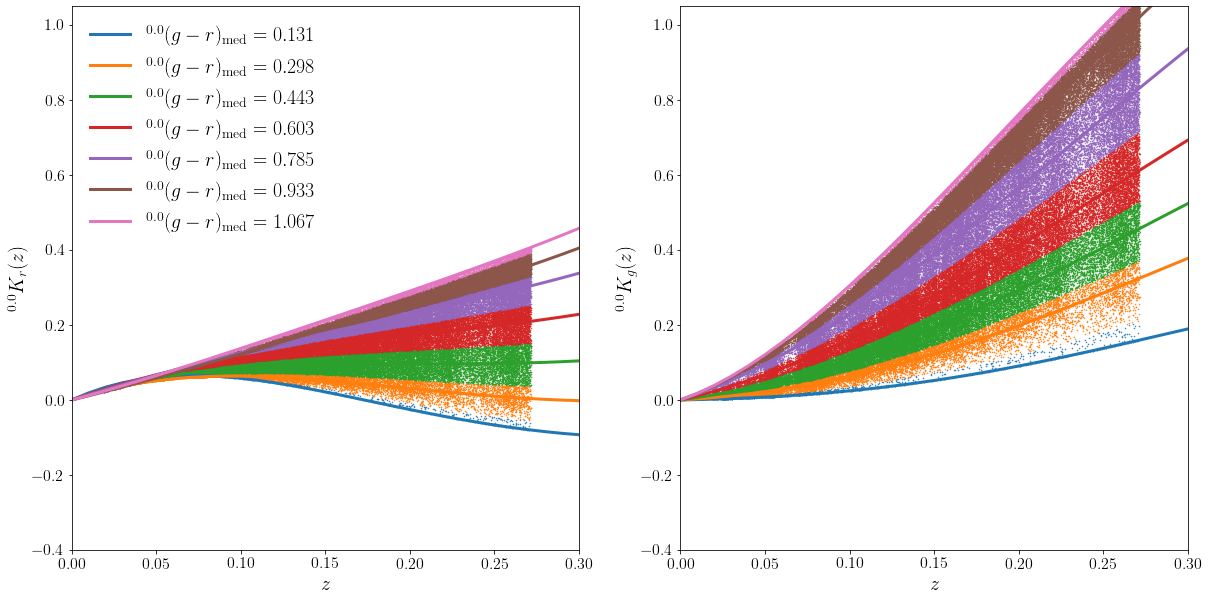

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)

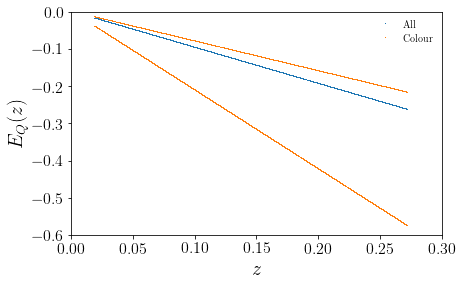

In [12]:
pl.plot(kE['ZSURV'], kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(kE['ZSURV'], kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

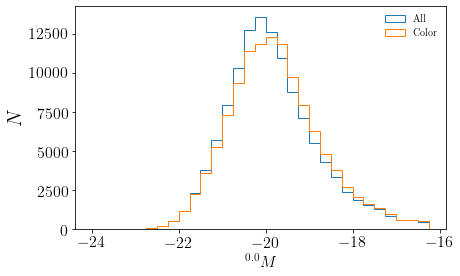

In [13]:
_ = pl.hist(kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

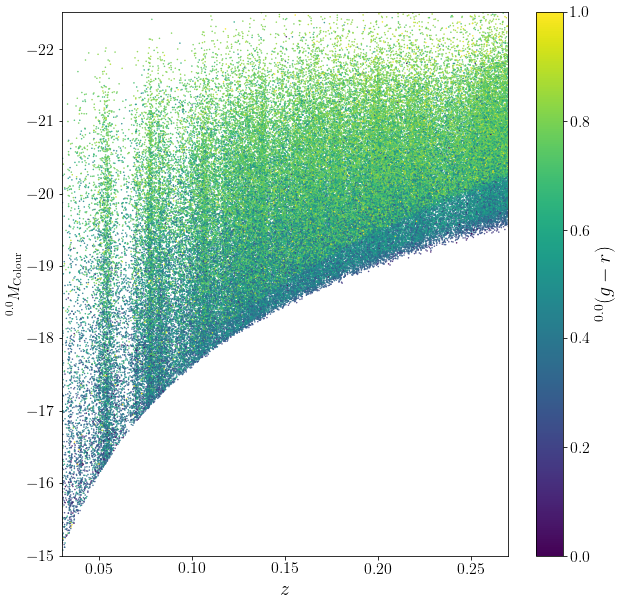

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(kE['ZSURV'], kE['MCOLOR_0P0'], c=kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

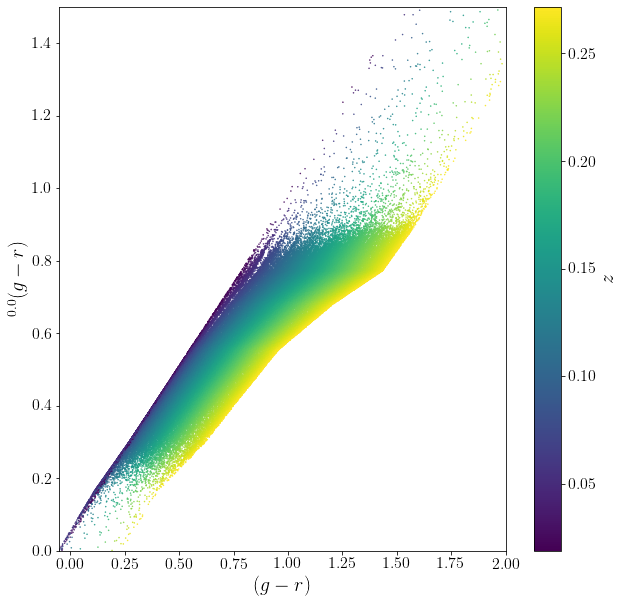

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(kE['GMR'], kE['REST_GMR_0P0'], c=kE['ZSURV'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='$z$')

# Done.